<a href="https://colab.research.google.com/github/Artyom995/neuro---face-recognition/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2216_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Задачи машинного зрения на OpenCV](https://colab.research.google.com/drive/1x1rxbNfV1ft1ztIPwxA3q34J4MULix5A)
2. [OpenCV. Распознавание лиц (практика)](https://colab.research.google.com/drive/1GwMZ8BAjtdKBDA5S0lAX1OPMFmIaYhqL)
3. Домашняя работа

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

#Функция размытия
def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)

#Функция для рисования овала вокруг лица
def draw_oval_on_face(image, x, y, width, height):
    center_face = (x + width // 2, y + height // 2)
    axes = (width // 3 + 10, height // 2)
    cv2.ellipse(image, center_face, axes, 0, 0, 360, (0, 0, 255), 2)

#Функция для рисования кругов вокруг глаз
def draw_circles_around_eyes(image, eyes, x, y):
    for (x_eye, y_eye, w_eye, h_eye) in eyes:
        center = (int(x + x_eye + 0.5 * w_eye), int(y + y_eye + 0.5 * h_eye))
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0)
        thickness = 3
        cv2.circle(image, center, radius, color, thickness)



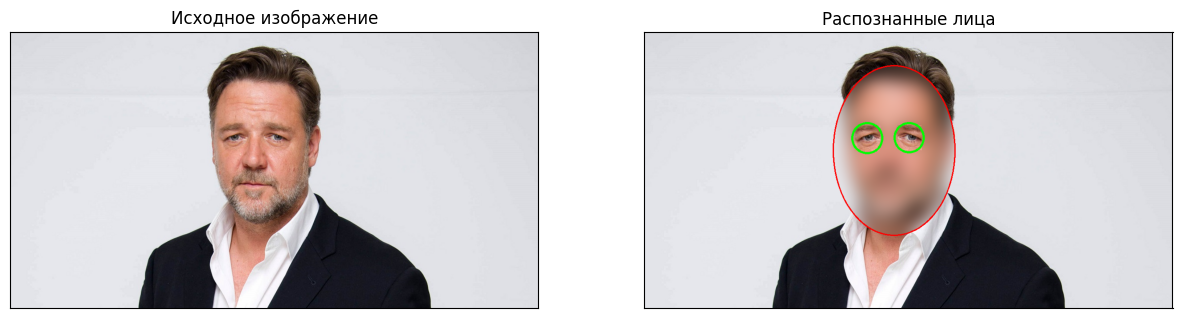

In [ ]:
import numpy as np
import cv2
import gdown

from matplotlib import pyplot

# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

# Скачивание изображения
gdown.download('https://storage.yandexcloud.net/rassel/Rassel.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./Rassel.jpg')
img2 = img.copy()

# Загрузка каскадов Хаара для распознавания лиц и глаз
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# Обработка каждого найденного лица
for box in bboxes: #цикл, проходящий по всем найденным лицам, координаты и размеры которых хранятся в списке bboxes
    x, y, width, height = box  #распаковываем координаты и размеры прямоугольника box в отдельные переменные
    face = img[y:y + height, x:x + width]   #извлекаем область изображения img, соответствующую найденному лицу
    eyes = classifier_eye.detectMultiScale(face)# используем классификатор для обнаружения глаз на извлеченном лице

    # Создание маски для овала лица
    mask = np.zeros(face.shape[:2], dtype=np.uint8)#создаем маску (двумерный массив) размером с лицо. Заполняем нулями (черный цвет)
    center_face = (width // 2, height // 2)# вычисляем центр овала, который будет рисоваться на маске
    axes = (width // 3 + 10, height // 2)# определяем размеры осей овала
    cv2.ellipse(mask, center_face, axes, 0, 0, 360, 255, -1) #рисуем овал на маске с помощью функции cv2.ellipse. 255 — цвет овала (белый, так как маска имеет тип uint8) там либо 0 либо 255.

    # создаем маску для глаз, которая изначально заполнена нулями (черный цвет)
    eye_mask = np.zeros(face.shape[:2], dtype=np.uint8) #np.zeros(...) — функция,создающая новый массив заполненный нулями.


    for (x_eye, y_eye, w_eye, h_eye) in eyes:# цикл проходит по всем найденным глазам, которые были обнаружены на лице.Переменные (x_eye, y_eye, w_eye, h_eye) координаты и размеры прямоугольника
        cv2.rectangle(eye_mask, (x_eye, y_eye), (x_eye + w_eye, y_eye + h_eye), 255, -1)#рисуем прямоугольник на маске для глаз (eye_mask)

        # Объединение масок (овал лица минус глаза)
        final_mask = cv2.bitwise_and(mask, cv2.bitwise_not(eye_mask))#создаеv финальную маску, которая представляет собой пересечение маски лица (mask) и инверсии маски глаз (eye_mask)

        # Размываем лицо, оставляя оригинальную область глаз четкой
        blurred_face = blur_face(face)#применяем функцию blur_face к области лица, чтобы размыть его
        blurred_face_masked = cv2.bitwise_and(blurred_face, blurred_face, mask=final_mask)#формируем маску для размытого лица, используя final_mask. cv2.bitwise_and накладывает маску на размытую область лица, оставляя только нужные участки и исключая глаза
        original_face_masked = cv2.bitwise_and(face, face, mask=~final_mask)#создаем маску для оригинального лица, используя инверсию final_mask (с помощью ~final_mask

        # Соединяем размытую и оригинальную часть лица
        final_face = cv2.add(blurred_face_masked, original_face_masked)#объединяем размытую часть лица (blurred_face_masked) и оригинальную часть лица (original_face_masked

        # Замена оригинальной области лица на итоговую размазанную часть
        img2[y:y + height, x:x + width] = final_face# заменяем оригинальную область лица в изображении img2 на итоговую размазанную часть (final_face)

        # Рисуем овал вокруг лица
        draw_oval_on_face(img2, x, y, width, height)#

        # Рисуем круги вокруг глаз
        draw_circles_around_eyes(img2, eyes, x, y)#


# Отображение оригинального и обработанного изображений
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

**ОЧКИ**

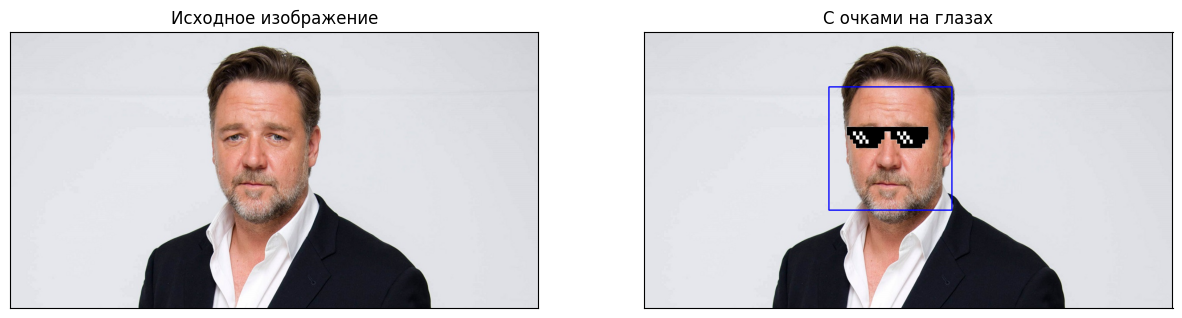

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as pyplot
import gdown


# Скачивание изображения
gdown.download('https://storage.yandexcloud.net/rassel/Rassel.jpg', None, quiet=True)
# Загрузка изображения очков
gdown.download('https://storage.yandexcloud.net/rassel/OCH.png', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./Rassel.jpg')
img2 = img.copy()  # Копируем оригинальное изображение для рисования

# Загружаем маску очков
glasses_mask = cv2.imread('./OCH.png', cv2.IMREAD_UNCHANGED)#cv2.IMREAD_UNCHANGED указывает, что изображение должно быть загружено в том виде, в каком оно есть
h_mask, w_mask = glasses_mask.shape[:2]#извлекаем высоту и ширину загруженного изображения (маски) из его формы (shape). glasses_mask.shape возвращает кортеж, содержащий размеры изображения

# Загрузка каскадов Хаара для распознавания лиц и глаз
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=1.3, minNeighbors=3, minSize=(50, 50))

# Формирование прямоугольника вокруг каждого обнаруженного лица и распознавание глаз
for (x, y, width, height) in bboxes:
    # Рисуем прямоугольник вокруг лица на копии изображения
    cv2.rectangle(img2, (x, y), (x + width, y + height), (255, 0, 0), 2)#

    # Область лица для поиска глаз
    face_region = img[y:y + height, x:x + width]# Извлекаем прямоугольную область изображения img
    eye_rects = classifier_eye.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))#Используем классификатор classifier_eye для обнаружения глаз в области face_region

    if len(eye_rects) >= 2:  # Убедимся, что найдены как минимум два глаза
        # Получаем координаты глаз
        eye_xs = []
        eye_ys = []
        for (ex, ey, ew, eh) in eye_rects:
            eye_xs.append(ex)
            eye_ys.append(ey)

        # Определяем границы для одного прямоугольника
        min_x = min(eye_xs)
        max_x = max(eye_xs) + ew  # Добавляем ширину последнего глаза
        min_y = min(eye_ys)
        max_y = max(eye_ys) + eh  # Добавляем высоту последнего глаза

        # Определяем позицию для наложения очков
        glasses_x = x + min_x
        glasses_y = y + min_y

        # Смещение влево в пикселях
        offset = 20
        glasses_x -= offset  # Сдвигаем очки влево

        # Определите коэффициенты для изменения размера
        width_scale = 1.4  # Увеличение ширины на 50%
        height_scale = 1.2  # Увеличение высоты на 20%

        # Изменяем размер маски очков под размер глаз с учетом коэффициентов
        glasses_resized = cv2.resize(glasses_mask, #cv2.resize используется для изменения размера изображения glasses_mask
                                      (int((max_x - min_x) * width_scale), int((max_y - min_y) * height_scale)), #int((max_x - min_x) * width_scale) — вычисляем новую ширину
                                      interpolation=cv2.INTER_AREA)#interpolation=cv2.INTER_AREA указывает метод интерполяции, который используется для изменения размера

        alpha_mask = glasses_resized[:, :, 3] / 255.0 # извлекаем четвертый компонент из изображения glasses_resized, который указывает уровень прозрачности
        glasses_color = glasses_resized[:, :, :3] #Извлекаются цветовые каналы (красный, зеленый и синий) из изображения glasses_resized

        for c in range(0, 3):   #Цикл по цветовым каналам. В результате получается изображение img2, на которое наложены очки с учетом их прозрачности
            img2[glasses_y:min(glasses_y + glasses_resized.shape[0], img2.shape[0]),    #Для каждого цветового канала c обновляется соответствующая область в img2
                glasses_x:min(glasses_x + glasses_resized.shape[1], img2.shape[1]), c] = \
            alpha_mask * glasses_color[:, :, c] + \
            (1 - alpha_mask) * img2[glasses_y:min(glasses_y + glasses_resized.shape[0], img2.shape[0]),
                                    glasses_x:min(glasses_x + glasses_resized.shape[1], img2.shape[1]), c]

# Отображение результата
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('С очками на глазах')

pyplot.show()